In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("/home/yash/Downloads/placement.csv")
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

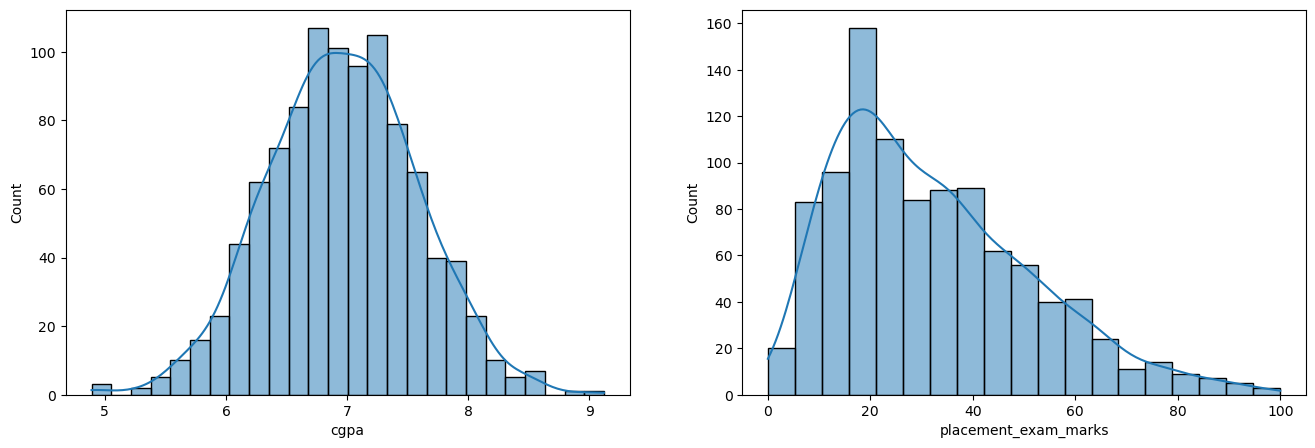

In [4]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde = True)
# cgpa is normally distributed 

plt.subplot(1,2,2)
sns.histplot(df["placement_exam_marks"],kde = True)

In [5]:
Mean = df["cgpa"].mean()
Std = df["cgpa"].std()
Min = df["cgpa"].min()
Max = df["cgpa"].max()

In [6]:
print("Mean Value of CGPA : ",Mean)
print("Standard Deviation of CGPA : ",Mean)
print("Min Value of CGPA : ",Min)
print("Max Value of CGPA : ",Max)

Mean Value of CGPA :  6.96124
Standard Deviation of CGPA :  6.96124
Min Value of CGPA :  4.89
Max Value of CGPA :  9.12


In [7]:
# Find a boundary of values of CGPA

print("Highest Allowed : ",Mean + 3*Std)
print("Lowest Allowed : ",Mean - 3*Std)

Highest Allowed :  8.808933625397168
Lowest Allowed :  5.113546374602832


In [8]:
# Find Outliers 

df[(df["cgpa"] > 8.80) | (df["cgpa"] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## 2nd Approch 
### Find Outliers by Z-Score 

In [9]:
df["cgpa_z-score"] = (df["cgpa"] - Mean)/Std

In [10]:
# Find Outliers 

df[(df["cgpa_z-score"] < -3) | (df["cgpa_z-score"] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## 1.Trimming

In [11]:
new_df = df[(df["cgpa"] < 8.80) & (df["cgpa"] > 5.11)] # Remove outlier data
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [12]:
new_df.shape

(995, 4)

In [13]:
# Also by Z-Score 

new_df = df[(df["cgpa_z-score"] > -3) | (df["cgpa_z-score"] < 3)] # Remove outlier data
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


## 2.Capping

In [14]:
upper_lim = Mean + 3*Std
lower_lim = Mean - 3*Std

print(upper_lim,lower_lim)

8.808933625397168 5.113546374602832


In [15]:
df["cgpa"] = np.where(df["cgpa"] > upper_lim,
                      upper_lim,
                      df["cgpa"])
                      
df["cgpa"] = np.where(df["cgpa"] < lower_lim,
                               lower_lim,
                               df["cgpa"]) 

# Replace where cgpa is greater than upper_lim by upper_lim and where cgpa is less than lower_lim by lower_lim

In [16]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [17]:
df.shape

(1000, 4)

In [18]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64